## Dataset Content

<b>Context</b>

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

<b>Attribute information</b>

- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in USD
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Ideas
- Do members and non-members have different buying behaviors? Males and females?
- How is the time of the day impacting the ratings?


       ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating']

## First look

In [1]:
# Importing librairies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [2]:
# Importing file
retail_original = pd.read_csv('./dataset/supermarket_sales - Sheet1.csv')
retail_original.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Shape
retail_original.shape

(1000, 17)

In [4]:
# Type
retail_original.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
# Column names
retail_original.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
# Looking for nulls
retail_original.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
# Decribe 
retail_original.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


#### First insights:
- Unit price (in USD): between 10.08 to 99.96 with an average of 55.67
- Quantity: between 1 and 10 with a median of 5 - the buyers don't buy many articles at once
- Total spent (in USD): between 10ish to 1042.65 with an average of 322.97 - outliers?
- Ratings: between 4 and 10 with a mean of 6.97

## Cleaning

In [10]:
# Dropping Invoice ID and City columns
retail_original = retail_original.drop(['Invoice ID', 'City'], axis=1)

In [ ]:
# Joining Date and Time to new Datetime column
retail_original["Datetime"] = retail_original["Date"] + ' ' + retail_original["Time"]

# Dropping Date and Time columns
retail_original = retail_original.drop(['Date', 'Time'], axis = 1)

In [16]:
# Converting Datetime object to datetime
retail_original['Datetime'] = pd.to_datetime(retail_original['Datetime'])

# Get hour
retail_original['Hour'] = retail_original['Datetime'].dt.hour

In [17]:
retail_original.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10


In [18]:
# Customer type
print(retail_original['Customer type'].value_counts())

# Balanced population

Member    501
Normal    499
Name: Customer type, dtype: int64


In [19]:
# 'Customer type' -> converting to dummy
retail_original['Customer type'] = retail_original['Customer type'].apply(lambda x: 1 if x == 'Member' else 0)
retail_original.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour
0,A,1,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13
1,C,0,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10
2,A,0,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13
3,A,1,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20
4,A,0,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10


In [20]:
# Gender count
retail_original['Gender'].value_counts()

# Balanced population

Female    501
Male      499
Name: Gender, dtype: int64

In [21]:
# price excl. tax
retail_original['Total excl tax'] = retail_original['Total'] - retail_original['Tax 5%']
retail_original.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Hour,Total excl tax
0,A,1,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,522.83
1,C,0,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,76.40
2,A,0,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,324.31
3,A,1,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,465.76
4,A,0,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,604.17


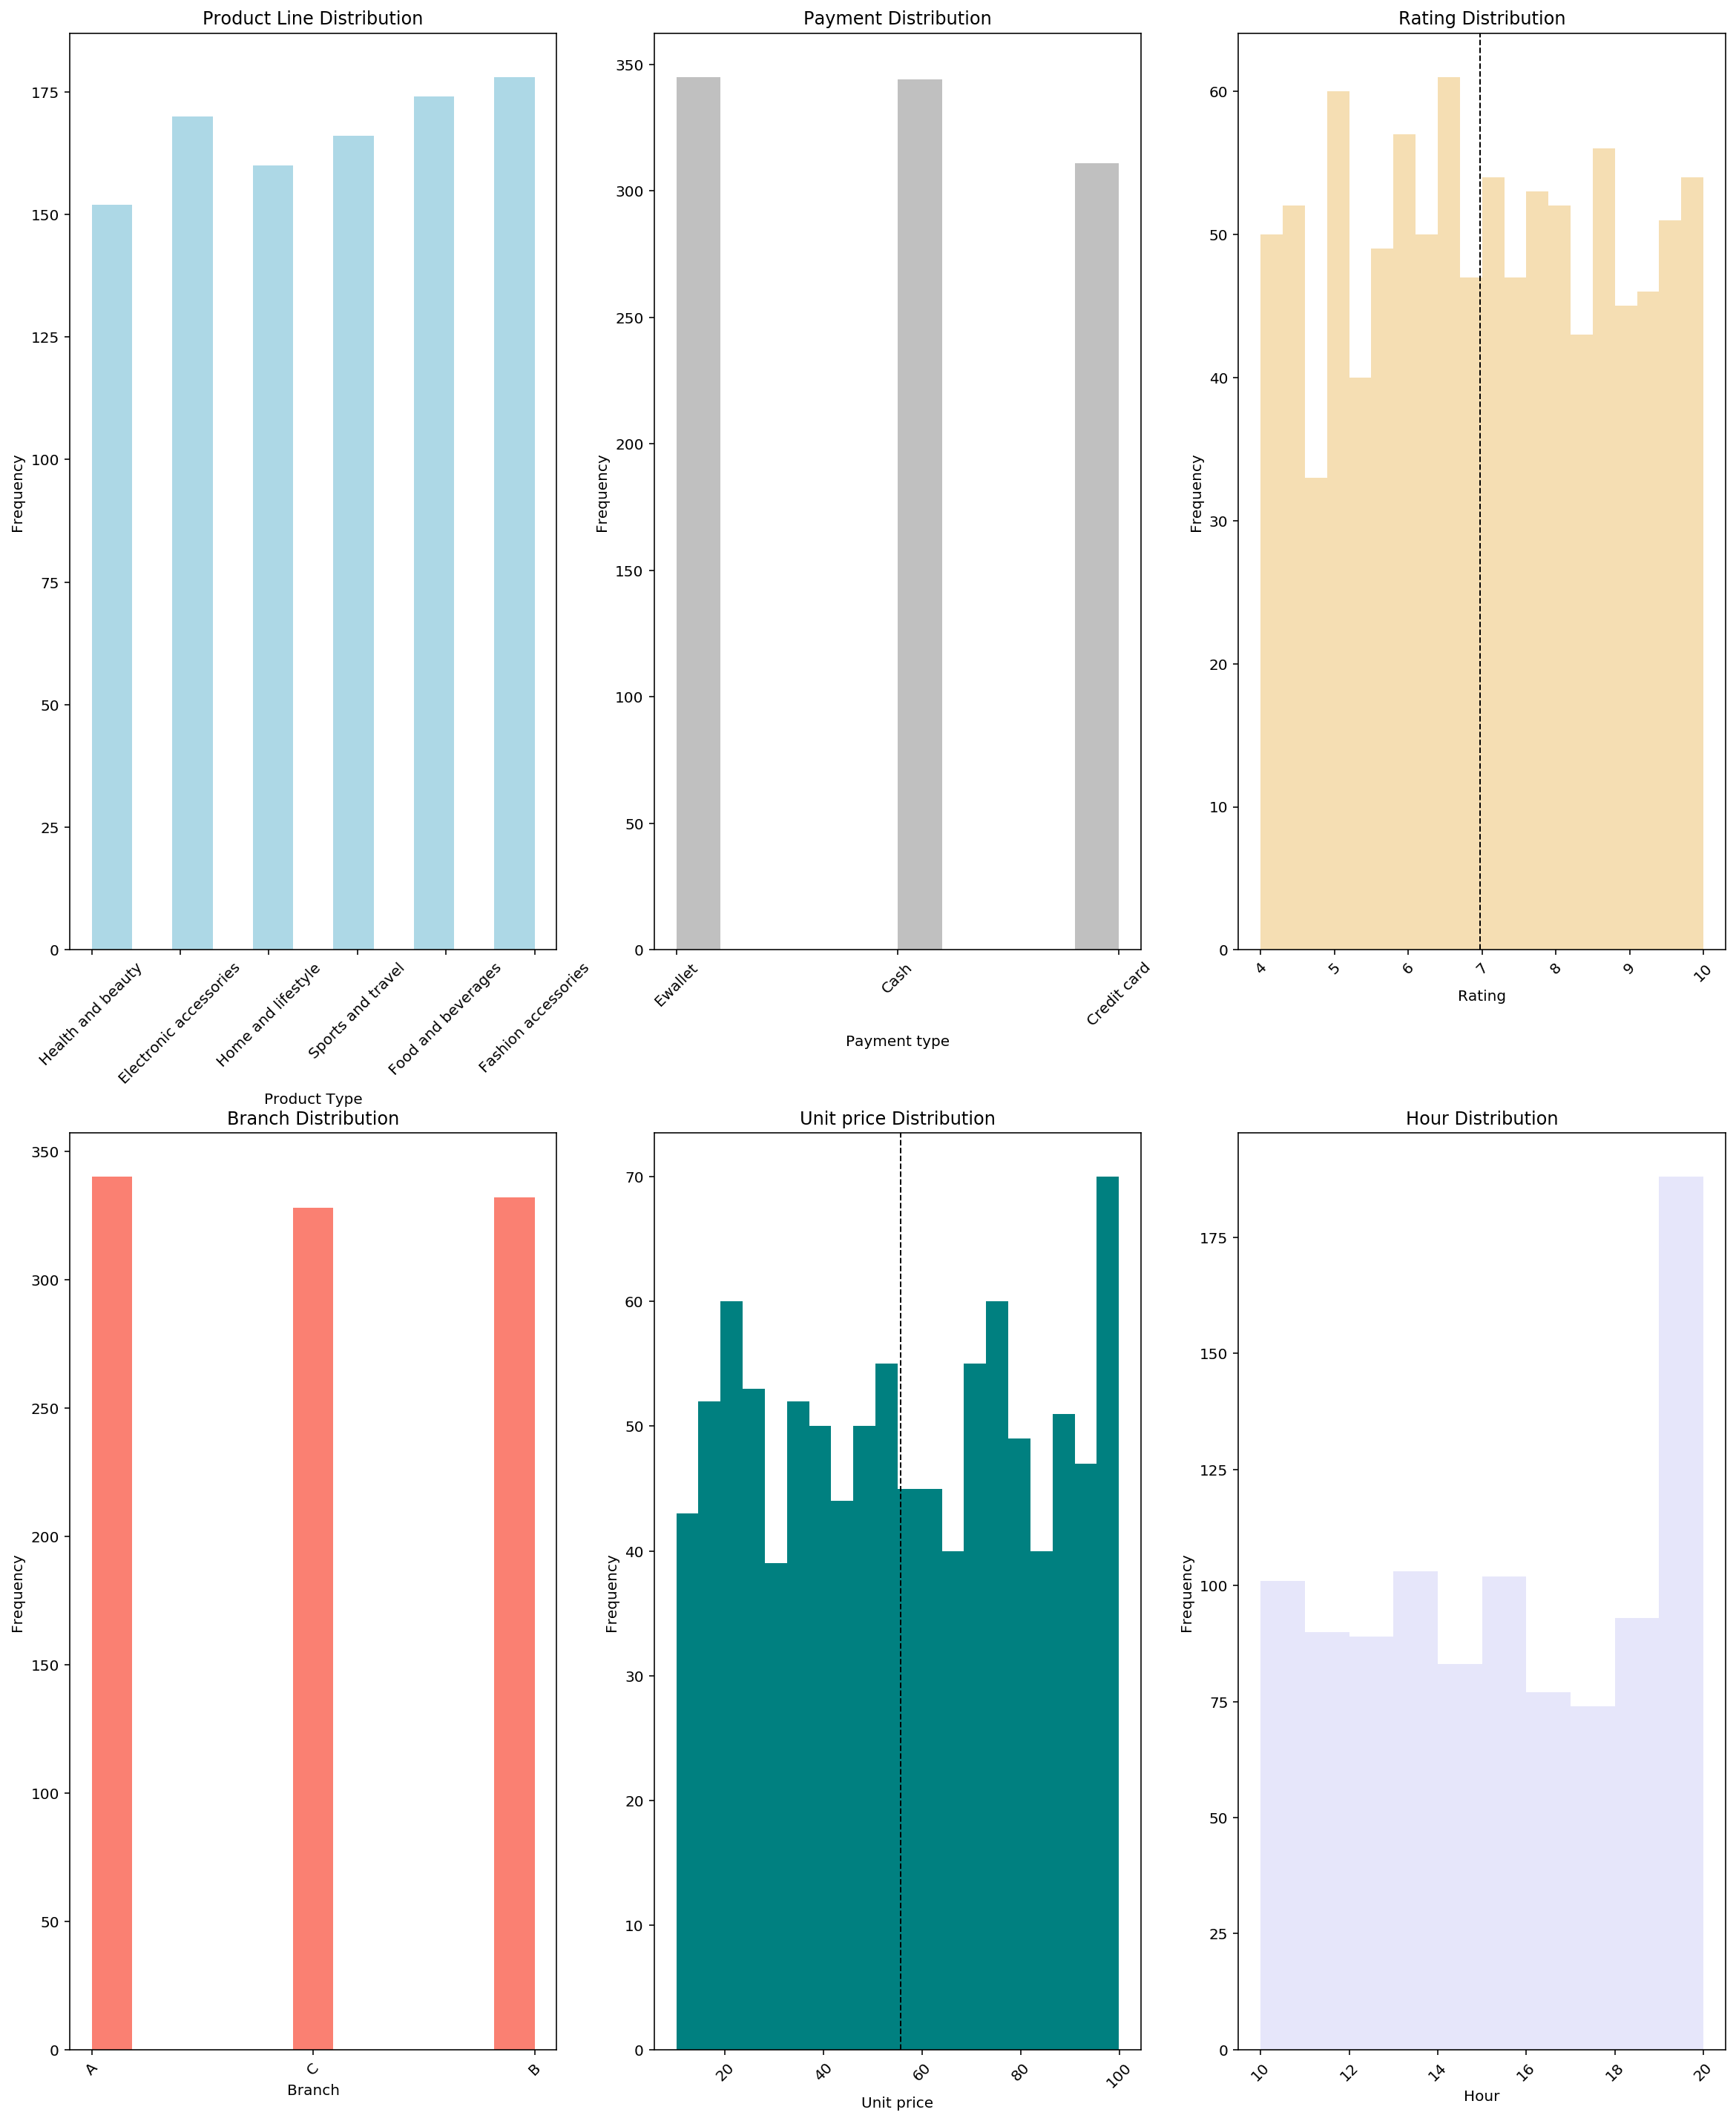

In [22]:
# Distributions
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (20,25))

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

axs[0, 0].hist(retail_original['Product line'], color = 'lightblue', bins = 11)
axs[0, 0].set_xlabel('Product Type')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Product Line Distribution')

axs[0, 1].hist(retail_original['Payment'], color = 'silver')
axs[0, 1].set_xlabel('Payment type')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Payment Distribution')

axs[0, 2].hist(retail_original['Rating'], color = 'wheat', bins = 20)
axs[0, 2].axvline(retail_original['Rating'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[0, 2].set_xlabel('Rating')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('Rating Distribution')

axs[1, 0].hist(retail_original['Branch'], color = 'salmon', bins = 11)
axs[1, 0].set_xlabel('Branch')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Branch Distribution')

axs[1, 1].hist(retail_original['Unit price'], color = 'teal', bins = 20)
axs[1, 1].axvline(retail_original['Unit price'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[1, 1].set_xlabel('Unit price')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Unit price Distribution')

axs[1, 2].hist(retail_original['Hour'], color = 'lavender', bins = 10)
axs[1, 2].set_xlabel('Hour')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].set_title('Hour Distribution')

plt.show()